(la data así te llega y no puedes considerar menos o más variables)

qué vamos a hacer?

Usaremos una regresión logística para clasificar nuestro dataset y poder predecir con un menor número de variables para poder graficar

# importar librerías

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [101]:
dataset = pd.read_csv('Wine.csv')

In [102]:
dataset.head(1)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065,1


In [103]:
X = dataset.iloc[:, 0:13].values

In [104]:
y = dataset.iloc[:, 13].values

# División de nuestas variables en el conjunto de entrenamiento y  en el conjunto de test

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)

# Escalamos las variables

In [107]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

In [108]:
X_train = sc_X.fit_transform(X_train)

In [109]:
X_test = sc_X.fit_transform(X_test)

# Reducción de la dimensión

In [21]:
from sklearn.decomposition import PCA

In [110]:
n=2

In [111]:
pca = PCA(n_components=n)

In [112]:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [113]:
explained_variance = pca.explained_variance_ratio_

In [114]:
explained_variance

array([0.36884109, 0.19318394])

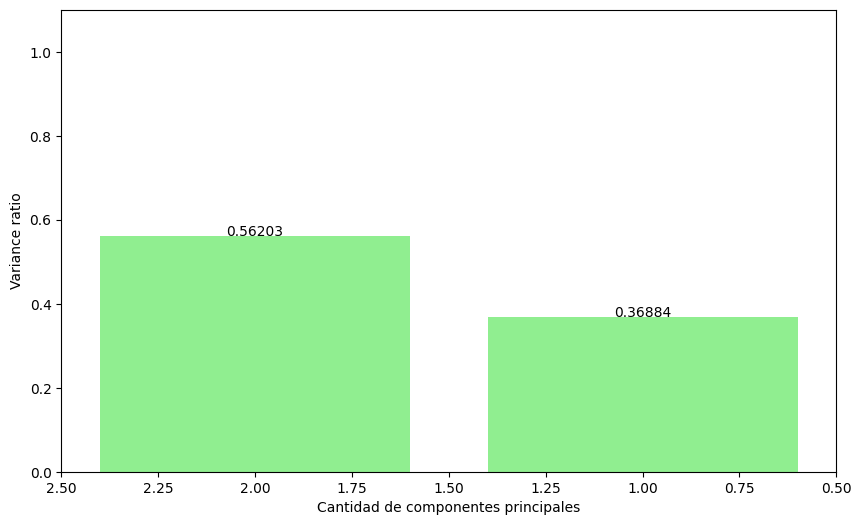

In [115]:
variance_ratio = np.cumsum(explained_variance)

# Gráfico
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.bar(range(1, n+1), variance_ratio, color="lightgreen")
ax.set(ylim=[0, 1.1], xlim=[n+0.5, 0.5], ylabel="Variance ratio", xlabel="Cantidad de componentes principales")
for x in range(n):
  ax.text(x+1, variance_ratio[x], round(variance_ratio[x], 5), ha="center")

# Ya tenemos menos variables (2 de hecho) y con esas 2 variables vamos a aplicar el modelo de Regresión Logística para clasificar

In [45]:
from sklearn.linear_model import LogisticRegression

In [116]:
classifier = LogisticRegression(random_state=0)

In [117]:
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

# Predecir

In [118]:
y_pred = classifier.predict(X_test)

# Para saber si es una buena predicción, usaremos una matriz de confusión (porque estamos usando un modelo de clasificación)

In [119]:
from sklearn.metrics import confusion_matrix

In [120]:
cm = confusion_matrix(y_test, y_pred)

In [121]:
cm

array([[14,  0,  0],
       [ 1, 15,  0],
       [ 0,  0,  6]], dtype=int64)

# Graficar

Representación gráfica de los resultados del algoritmo en el Conjunto de Training

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


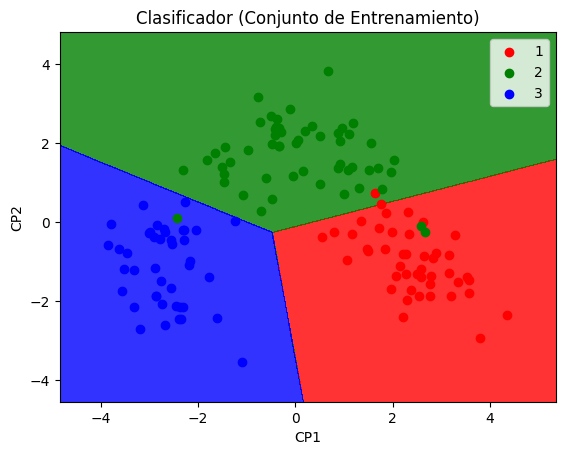

In [122]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.8, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Clasificador (Conjunto de Entrenamiento)')
plt.xlabel('CP1')
plt.ylabel('CP2')
plt.legend()
plt.show()

Representación gráfica de los resultados del algoritmo en el Conjunto de Testing

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


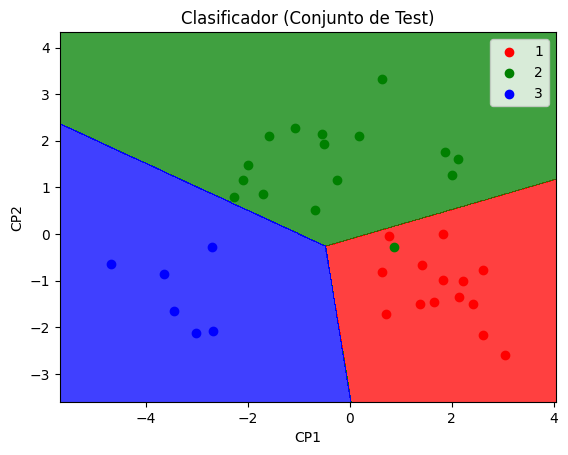

In [123]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Clasificador (Conjunto de Test)')
plt.xlabel('CP1')
plt.ylabel('CP2')
plt.legend()
plt.show()